In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [18]:
dataset = pd.read_csv("./data/EURUSD_H4.csv", sep="\t")

open = dataset["Open"].values
close = dataset["Close"].values
low = dataset["Low"].values
high = dataset["High"].values


In [19]:
open_low = np.subtract(open, low)
open_close = np.subtract(open, close)
high_open = np.subtract(high, open)

<AxesSubplot:>

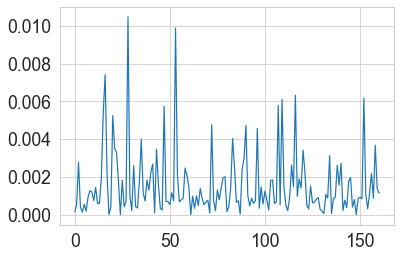

In [23]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2)
sns.lineplot(data=open_low)

c:\Users\User\Documents\Web Development\financial-analysis\financial-analysis\python\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\User\Documents\Web Development\financial-analysis\financial-analysis\python\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\User\Documents\Web Development\fin

,sumsquare_error,aic,bic,kl_div
invweibull,480955.830481,-602.806290,1303.586556,inf
alpha,491184.938796,-647.546127,1306.974845,inf
nct,492761.948467,-623.004036,1312.572332,inf
lognorm,496182.044432,-635.145912,1308.604515,inf
johnsonsu,496546.228747,-632.987809,1313.804045,inf


c:\Users\User\Documents\Web Development\financial-analysis\financial-analysis\python\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\User\Documents\Web Development\financial-analysis\financial-analysis\python\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, hi

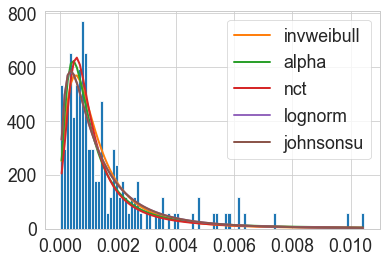

In [25]:
f = Fitter(open_low)
f.fit()
f.summary()

In [26]:
f.get_best(method='sumsquare_error')

{'invweibull': {'c': 2.656239021878923,
  'loc': -0.0010869758093790423,
  'scale': 0.001821190431496626}}

,sumsquare_error,aic,bic,kl_div
lognorm,4.961820e+05,-635.145912,1308.604515,inf
expon,6.068811e+05,-618.892998,1335.946907,inf
cauchy,6.695748e+05,-529.252627,1351.774818,inf
exponpow,8.526475e+05,-611.960320,1395.770453,inf
rayleigh,1.357843e+06,-381.318680,1465.603396,inf


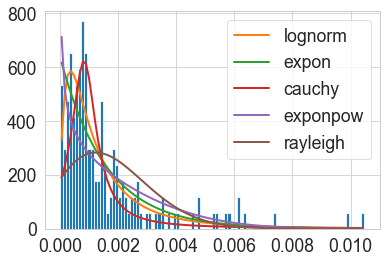

In [27]:
f = Fitter(open_low, distributions=get_common_distributions())
f.fit()
f.summary()

In [35]:
open_lag = np.insert(open, 0, open[0])
open = np.insert(open, -1, open[0])
open_lag.shape

(163,)